### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

### Data

In [5]:
train = pd.read_csv("/Users/pbezuhov/git/Kaggle/data/mnist/train.csv")
test = pd.read_csv("/Users/pbezuhov/git/Kaggle/data/mnist/test.csv")

train_y = train.label
train_x = train.drop("label", axis=1)

### Plot examples of the digits

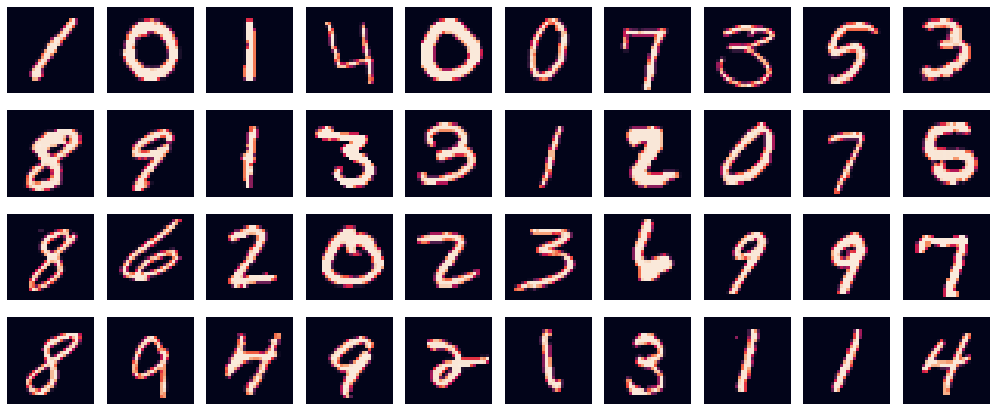

In [11]:
# plot some of the numbers
plt.figure(figsize=(14,6))

for i in range(0,40):
    plt.subplot(4,10, i + 1)
    grid_data = train_x.iloc[i].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

### Perform Principal Component Axis (PCA) on the dataset

In [14]:
import plotly.graph_objs as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import plotly.offline as py
py.init_notebook_mode(connected=True)

# Taking only the first N rows to speed things up
x_reduced = train_x[:6000].values
y_reduced = train_y[:6000]

# Standardising the values
x_std = StandardScaler().fit_transform(x_reduced)

# Call the PCA method with 5 components. 
pca = PCA(n_components=5)
pca.fit(x_std)
x_5d = pca.transform(x_std)

trace0 = go.Scatter(
    x = x_5d[:,0],
    y = x_5d[:,1],
    name = y_reduced,
    hoveron = y_reduced,
    mode = 'markers',
    text = y_reduced,
    showlegend = False,
    marker = dict(
        size = 8,
        color = y_reduced,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)

data = [trace0]

layout = go.Layout(
    title= 'Principal Component Analysis (PCA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')